In [2]:
import pandas as pd

In [4]:
dict_ = {'a':[11,21,31],'b':[34,43,54]}

df = pd.DataFrame(dict_)

df.head()

,a,b
0,11,34
1,21,43
2,31,54


In [5]:
df.mean()

a    21.000000
b    43.666667
dtype: float64

### REST API

In [7]:
!pip install nba_api

In [11]:
from nba_api.stats.static import teams

In [12]:
nba_teams = teams.get_teams()

In [14]:
nba_teams[:2]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946}]

In [16]:
df_teams_test = pd.DataFrame(nba_teams)
df_teams_test.head()

,abbreviation,city,full_name,id,nickname,state,year_founded
0,ATL,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949
1,BOS,Boston,Boston Celtics,1610612738,Celtics,Massachusetts,1946
2,CLE,Cleveland,Cleveland Cavaliers,1610612739,Cavaliers,Ohio,1970
3,NOP,New Orleans,New Orleans Pelicans,1610612740,Pelicans,Louisiana,2002
4,CHI,Chicago,Chicago Bulls,1610612741,Bulls,Illinois,1966


In [19]:
df_warriors = df_teams_test[df_teams_test['nickname']=='Warriors']
df_warriors

,abbreviation,city,full_name,id,nickname,state,year_founded
7,GSW,Golden State,Golden State Warriors,1610612744,Warriors,California,1946


In [21]:
id_warriors = df_warriors[['id']].values[0][0]
id_warriors 

1610612744

In [22]:
from nba_api.stats.endpoints import leaguegamefinder as lgf

In [25]:
gamefinder = lgf.LeagueGameFinder(team_id_nullable = id_warriors)


In [26]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,0021900730,2020-02-01,GSW @ CLE,W,242,131,...,0.895,10.0,34.0,44.0,39,11,10,11,16,19.0
1,22019,1610612744,GSW,Golden State Warriors,0021900717,2020-01-30,GSW @ BOS,L,239,104,...,0.867,3.0,27.0,30.0,24,11,6,16,19,-15.0
2,22019,1610612744,GSW,Golden State Warriors,0021900702,2020-01-28,GSW @ PHI,L,239,104,...,0.714,6.0,34.0,40.0,29,6,3,13,24,-11.0
3,22019,1610612744,GSW,Golden State Warriors,0021900679,2020-01-24,GSW vs. IND,L,241,118,...,0.826,7.0,31.0,38.0,31,6,3,20,16,-11.0
4,22019,1610612744,GSW,Golden State Warriors,0021900665,2020-01-22,GSW vs. UTA,L,241,96,...,0.833,11.0,26.0,37.0,20,5,5,8,23,-33.0


In [28]:
import matplotlib.pyplot as plt

In [32]:
games_home =games[games['MATCHUP']=='GSW vs. IND']
games_away =games[games['MATCHUP']=='GSW @ IND']

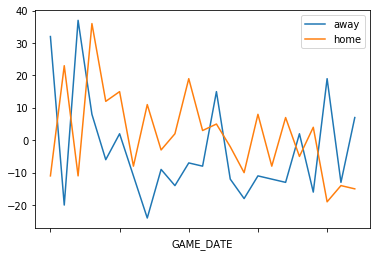

In [33]:
fig, ax = plt.subplots()
games_away.plot(x = 'GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x = 'GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away","home"])
plt.show()